<a href="https://colab.research.google.com/github/Deptage/data_mining_project/blob/main/regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#One Hot Encoding

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load data
ured_normalized = pd.read_csv('usa-real-estate-dataset-normalized.csv')

# Define categorical columns
categorical_cols = ['state', 'city']

# Step 1: Select top 2000 most frequent cities
top_cities = (
    ured_normalized['city']
    .value_counts()
    .nlargest(200)
    .index
)

# Replace rare cities with a placeholder
ured_normalized['city'] = ured_normalized['city'].where(ured_normalized['city'].isin(top_cities), other='__other__')

# Step 2: One-hot encode
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
encoded_features = enc.fit_transform(ured_normalized[categorical_cols])

# Get informative feature names
encoded_col_names = enc.get_feature_names_out(categorical_cols)

# Create DataFrame with meaningful names
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_features, columns=encoded_col_names)

# Combine with original data
ured_encoded = pd.concat([ured_normalized.drop(columns=categorical_cols), encoded_df], axis=1)

In [3]:
ured_encoded

,price,bed,bath,acre_lot,zip_code,house_size,sold_before,years_since_sold,city_population,state_Alabama,...,city_Vancouver,city_Venice,city_Washington,city_West Palm Beach,city_Wilmington,city_Winchester,city_Woodbridge,city_York,city_Yukon,city___other__
0,105000.0,3.0,2.0,1.100000e-06,601.0,0.076813,0,0,0.000227,0,...,0,0,0,0,0,0,0,0,0,1.0
1,80000.0,4.0,2.0,7.000001e-07,601.0,0.108446,0,0,0.000227,0,...,0,0,0,0,0,0,0,0,0,1.0
2,67000.0,2.0,1.0,1.400000e-06,795.0,0.065555,0,0,0.000354,0,...,0,0,0,0,0,0,0,0,0,1.0
3,145000.0,4.0,2.0,9.000001e-07,731.0,0.119433,0,0,0.006060,0,...,0,0,0,0,0,0,0,0,0,1.0
4,179000.0,4.0,3.0,4.500000e-06,612.0,0.141611,0,0,0.000461,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616930,359900.0,4.0,2.0,3.200000e-06,99354.0,0.162622,1,2,0.003111,0,...,0,0,0,0,0,0,0,0,0,1.0
1616931,350000.0,3.0,2.0,9.000001e-07,99354.0,0.112216,1,2,0.003111,0,...,0,0,0,0,0,0,0,0,0,1.0
1616932,440000.0,6.0,3.0,4.900000e-06,99354.0,0.156118,1,2,0.003111,0,...,0,0,0,0,0,0,0,0,0,1.0
1616933,179900.0,2.0,1.0,8.000001e-07,99354.0,0.077617,1,2,0.003111,0,...,0,0,0,0,0,0,0,0,0,1.0


# Univariate Feature Selection for Regression

In [4]:
X_encoded = ured_encoded.drop(columns=['price'])
y = ured_encoded['price']

In [5]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_encoded, y)
feature_scores = pd.Series(selector.scores_, index=X_encoded.columns)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_scores.sort_values(ascending=False))

c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


bath                          167435.796166
house_size                    105755.866016
bed                            46826.495396
state_California               28604.914328
city_New York City             23311.510279
city_New York                  19622.305296
city_population                11552.355466
state_New York                  7103.574394
city_Los Angeles                5405.444726
city_Miami Beach                4275.899600
zip_code                        4185.718504
city_San Francisco              3564.830256
state_Ohio                      3177.636633
state_Hawaii                    2158.581209
city_Naples                     2014.546447
state_Pennsylvania              1786.710345
state_Illinois                  1768.511421
state_Texas                     1753.203317
city_San Jose                   1499.419309
state_Oklahoma                  1480.528234
state_Missouri                  1457.655578
state_Colorado                  1372.132622
city_San Diego                  

In [6]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

ured_normalized = pd.read_csv('usa-real-estate-dataset-normalized.csv')

categorical_cols = ['city', 'state', 'zip_code']

top_cities = (
    ured_normalized['city']
    .value_counts()
    .nlargest(200)
    .index
)
ured_normalized['city'] = ured_normalized['city'].where(ured_normalized['city'].isin(top_cities), other='__other__')


enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ured_normalized[categorical_cols] = enc.fit_transform(ured_normalized[categorical_cols])


X = ured_normalized.drop('price', axis=1)
y = ured_normalized['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2137)


rf_model = RandomForestRegressor(random_state=2137, n_estimators=100)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df


KeyboardInterrupt: 

In [7]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_squared_error, r2_score
import numpy as np

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=2137, enable_categorical=True, subsample=0.8, n_estimators=1000, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0, colsample_bytree=0.5)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

ModuleNotFoundError: No module named 'xgboost'

## XGBoost, whole zip code - category, top 200 cities - category, all states - category

In [37]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler
ured_normalized = pd.read_csv('usa-real-estate-dataset-normalized.csv')

top_cities = ured_normalized['city'].value_counts().nlargest(200).index
ured_normalized['city'] = ured_normalized['city'].where(ured_normalized['city'].isin(top_cities), '__other__')

ured_dummies = pd.get_dummies(ured_normalized, columns=['city', 'state'], drop_first=True)

zip_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ured_dummies[['zip_code']] = zip_encoder.fit_transform(ured_dummies[['zip_code']])
ured_dummies['zip_code'] = ured_dummies['zip_code'].astype('category')
q_high = ured_dummies['price'].quantile(0.99)
ured_dummies = ured_dummies[ured_dummies['price'] < q_high]
X = ured_dummies.drop('price', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = ured_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2137)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=2137, enable_categorical=True, subsample=0.8, n_estimators=1000, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0, colsample_bytree=0.5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 63097296807.47998
RMSE: 251191.75306422776
MAE: 142406.253809743
R-squared: 0.6804047915782097


In [38]:
xgb_model.save_model("models/xgb_model_200c_50s_zipcode_cat.json")

## XGBoost, 2digits zip code - category, top 200 cities - category, all states - category

In [39]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np

ured_normalized = pd.read_csv('usa-real-estate-dataset-normalized-zipcodes-f2cat.csv')

top_cities = ured_normalized['city'].value_counts().nlargest(200).index
ured_normalized['city'] = ured_normalized['city'].where(ured_normalized['city'].isin(top_cities), '__other__')

ured_dummies = pd.get_dummies(ured_normalized, columns=['city', 'state'], drop_first=True)

zip_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ured_dummies[['zip_code']] = zip_encoder.fit_transform(ured_dummies[['zip_code']])
ured_dummies['zip_code'] = ured_dummies['zip_code'].astype('category')
q_high = ured_dummies['price'].quantile(0.99)
ured_dummies = ured_dummies[ured_dummies['price'] < q_high]

X = ured_dummies.drop('price', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = ured_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2137)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=2137, enable_categorical=True, subsample=0.8, n_estimators=1000, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0, colsample_bytree=0.5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 68034037887.93273
RMSE: 260833.35271382134
MAE: 148728.9832105976
R-squared: 0.6553996190215198


In [40]:
xgb_model.save_model("models/xgb_model_200c_50s_zipcode_f2cat.json")

## XGBoost, 2digits zip code - numerical, top 200 cities - category, all states - category

In [41]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler

ured_normalized = pd.read_csv('usa-real-estate-dataset-normalized-zipcodes-f2num.csv')

top_cities = ured_normalized['city'].value_counts().nlargest(200).index
ured_normalized['city'] = ured_normalized['city'].where(ured_normalized['city'].isin(top_cities), '__other__')

ured_dummies = pd.get_dummies(ured_normalized, columns=['city', 'state'], drop_first=True)

# zip_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# ured_dummies[['zip_code']] = zip_encoder.fit_transform(ured_dummies[['zip_code']])
# ured_dummies['zip_code'] = ured_dummies['zip_code'].astype('category')
q_high = ured_dummies['price'].quantile(0.99)
ured_dummies = ured_dummies[ured_dummies['price'] < q_high]

X = ured_dummies.drop('price', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = ured_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2137)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=2137, enable_categorical=True, subsample=0.8, n_estimators=1000, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0, colsample_bytree=0.5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 68034037887.93273
RMSE: 260833.35271382134
MAE: 148728.9832105976
R-squared: 0.6553996190215198


In [42]:
xgb_model.save_model("models/xgb_model_200c_50s_zipcode_f2num.json")

## XGBoost, 2digits zip code - category

In [43]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler

ured_normalized = pd.read_csv('usa-real-estate-dataset-normalized-zipcodes-f2cat.csv')
ured_normalized = ured_normalized.drop(columns=['state', 'city'])
# top_cities = ured_normalized['city'].value_counts().nlargest(200).index
# ured_normalized['city'] = ured_normalized['city'].where(ured_normalized['city'].isin(top_cities), '__other__')

# ured_dummies = pd.get_dummies(ured_normalized, columns=['city', 'state'], drop_first=True)
ured_dummies = ured_normalized.copy()
zip_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ured_dummies[['zip_code']] = zip_encoder.fit_transform(ured_dummies[['zip_code']])
ured_dummies['zip_code'] = ured_dummies['zip_code'].astype('category')
q_high = ured_dummies['price'].quantile(0.99)
ured_dummies = ured_dummies[ured_dummies['price'] < q_high]
X = ured_dummies.drop('price', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = ured_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2137)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=2137, enable_categorical=True, subsample=0.8, n_estimators=1000, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0, colsample_bytree=0.5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 68359189345.36329
RMSE: 261455.90325208433
MAE: 148659.36775319482
R-squared: 0.6537526887556602


In [44]:
xgb_model.save_model("models/xgb_model_zipcode_f2cat.json")

## XGBoost, 2digits zip code - numerical

In [45]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler

ured_normalized = pd.read_csv('usa-real-estate-dataset-normalized-zipcodes-f2num.csv')
ured_normalized = ured_normalized.drop(columns=['state', 'city'])
# top_cities = ured_normalized['city'].value_counts().nlargest(200).index
# ured_normalized['city'] = ured_normalized['city'].where(ured_normalized['city'].isin(top_cities), '__other__')

# ured_dummies = pd.get_dummies(ured_normalized, columns=['city', 'state'], drop_first=True)

# zip_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# ured_dummies[['zip_code']] = zip_encoder.fit_transform(ured_dummies[['zip_code']])
# ured_dummies['zip_code'] = ured_dummies['zip_code'].astype('category')
ured_dummies = ured_normalized.copy()
q_high = ured_dummies['price'].quantile(0.99)
ured_dummies = ured_dummies[ured_dummies['price'] < q_high]

X = ured_dummies.drop('price', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = ured_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2137)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=2137, enable_categorical=True, subsample=0.8, n_estimators=1000, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0, colsample_bytree=0.5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 68359189345.36329
RMSE: 261455.90325208433
MAE: 148659.36775319482
R-squared: 0.6537526887556602


In [46]:
xgb_model.save_model("models/xgb_model_zipcode_f2num.json")

In [47]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler

ured_normalized = pd.read_csv('usa-real-estate-dataset-normalized.csv')
ured_normalized = ured_normalized.drop(columns=['state', 'city'])
# top_cities = ured_normalized['city'].value_counts().nlargest(200).index
# ured_normalized['city'] = ured_normalized['city'].where(ured_normalized['city'].isin(top_cities), '__other__')

# ured_dummies = pd.get_dummies(ured_normalized, columns=['city', 'state'], drop_first=True)
ured_dummies = ured_normalized.copy()
zip_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ured_dummies[['zip_code']] = zip_encoder.fit_transform(ured_dummies[['zip_code']])
ured_dummies['zip_code'] = ured_dummies['zip_code'].astype('category')
q_high = ured_dummies['price'].quantile(0.99)
ured_dummies = ured_dummies[ured_dummies['price'] < q_high]

X = ured_dummies.drop('price', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = ured_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2137)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=2137, enable_categorical=True, subsample=0.8, n_estimators=1000, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0, colsample_bytree=0.5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 63734204899.72791
RMSE: 252456.34256189308
MAE: 142610.43260493668
R-squared: 0.6771787773939796


In [48]:
xgb_model.save_model("models/xgb_model_zipcode_cat.json")

# nn

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
import numpy as np
import os
import matplotlib.pyplot as plt

def nn_model(model_name, X, y):

    os.makedirs("models", exist_ok=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2137)
    # === Model Definition ===
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Linear output for regression
    ])
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])

    # === Callbacks ===
    checkpoint_cb = ModelCheckpoint(
        filepath='models/best_model.keras',
        monitor='val_mae',
        save_best_only=True,
        save_weights_only=False,
        mode='min',
        verbose=1
    )

    early_stop_cb = EarlyStopping(
        monitor='val_mae',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )


    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=1,
        callbacks=[checkpoint_cb, early_stop_cb]
    )

    model.save(f"models/{model_name}.keras")

    # === Evaluate on test set ===
    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test MAE: {test_mae}")

    # === Predict ===
    y_pred_log = model.predict(X_test)

    # Revert log1p transformation
    y_pred_actual = np.expm1(y_pred_log)
    y_test_actual = np.expm1(y_test)

    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.legend()
    plt.title("Training History")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Absolute Error")
    plt.grid(True)
    plt.show()

In [50]:
zip_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)


ured_normalized = pd.read_csv('usa-real-estate-dataset-normalized.csv')
top_cities = ured_normalized['city'].value_counts().nlargest(200).index
ured_normalized['city'] = ured_normalized['city'].where(ured_normalized['city'].isin(top_cities), '__other__')
q_high = ured_normalized['price'].quantile(0.99)
ured_normalized = ured_normalized[ured_normalized['price'] < q_high]

ured_f2cat = pd.read_csv('usa-real-estate-dataset-normalized-zipcodes-f2cat.csv')
top_cities = ured_f2cat['city'].value_counts().nlargest(200).index
ured_f2cat['city'] = ured_f2cat['city'].where(ured_f2cat['city'].isin(top_cities), '__other__')
q_high = ured_f2cat['price'].quantile(0.99)
ured_f2cat = ured_f2cat[ured_f2cat['price'] < q_high]

ured_f2num = pd.read_csv('usa-real-estate-dataset-normalized-zipcodes-f2num.csv')
top_cities = ured_f2num['city'].value_counts().nlargest(200).index
ured_f2num['city'] = ured_f2num['city'].where(ured_f2num['city'].isin(top_cities), '__other__')
q_high = ured_f2num['price'].quantile(0.99)
ured_f2num = ured_f2num[ured_f2num['price'] < q_high]


ured_full_zipcode_geo = ured_normalized.copy()
ured_full_zipcode_geo = pd.get_dummies(ured_full_zipcode_geo, columns=['city', 'state'], drop_first=True)
ured_full_zipcode_geo[['zip_code']] = zip_encoder.fit_transform(ured_full_zipcode_geo[['zip_code']])
ured_full_zipcode_geo['zip_code'] = ured_full_zipcode_geo['zip_code'].astype('category')

ured_full_zipcode_nogeo = ured_normalized.drop(columns=['city', 'state'])
ured_full_zipcode_nogeo[['zip_code']] = zip_encoder.fit_transform(ured_full_zipcode_nogeo[['zip_code']])
ured_full_zipcode_nogeo['zip_code'] = ured_full_zipcode_nogeo['zip_code'].astype('category')

ured_zipcode_f2cat_geo = ured_f2cat.copy()
ured_zipcode_f2cat_geo = pd.get_dummies(ured_zipcode_f2cat_geo, columns=['city', 'state'], drop_first=True)
ured_zipcode_f2cat_geo[['zip_code']] = zip_encoder.fit_transform(ured_zipcode_f2cat_geo[['zip_code']])
ured_zipcode_f2cat_geo['zip_code'] = ured_zipcode_f2cat_geo['zip_code'].astype('category')

ured_zipcode_f2cat_nogeo = ured_f2cat.drop(columns=['city', 'state'])
ured_zipcode_f2cat_nogeo[['zip_code']] = zip_encoder.fit_transform(ured_zipcode_f2cat_nogeo[['zip_code']])
ured_zipcode_f2cat_nogeo['zip_code'] = ured_zipcode_f2cat_nogeo['zip_code'].astype('category')

ured_zipcode_f2num_geo = ured_f2num.copy()
ured_zipcode_f2num_geo = pd.get_dummies(ured_zipcode_f2num_geo, columns=['city', 'state'], drop_first=True)


ured_zipcode_f2num_nogeo = ured_f2num.drop(columns=['city', 'state'])

X1 = ured_full_zipcode_geo.drop(columns=['price'])
y1 = ured_full_zipcode_geo['price']
X2 = ured_full_zipcode_nogeo.drop(columns=['price'])
y2 = ured_full_zipcode_nogeo['price']
X3 = ured_zipcode_f2cat_geo.drop(columns=['price'])
y3 = ured_zipcode_f2cat_geo['price']
X4 = ured_zipcode_f2cat_nogeo.drop(columns=['price'])
y4 = ured_zipcode_f2cat_nogeo['price']
X5 = ured_zipcode_f2num_geo.drop(columns=['price'])
y5 = ured_zipcode_f2num_geo['price']
X6 = ured_zipcode_f2num_nogeo.drop(columns=['price'])
y6 = ured_zipcode_f2num_nogeo['price']

scaler = StandardScaler()

X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)
X3 = scaler.fit_transform(X3)
X4 = scaler.fit_transform(X4)
X5 = scaler.fit_transform(X5)
X6 = scaler.fit_transform(X6)

c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
32007/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 190384.6250 - mae: 190384.6250
Epoch 1: val_mae improved from inf to 157166.31250, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 190379.8750 - mae: 190379.8750 - val_loss: 157166.3125 - val_mae: 157166.3125
Epoch 2/50
32013/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 163783.0938 - mae: 163783.0938
Epoch 2: val_mae improved from 157166.31250 to 155120.04688, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 163783.0469 - mae: 163783.0469 - val_loss: 155120.0469 - val_mae: 155120.0469
Epoch 3/50
31977/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 161483.0938 - mae: 161483.0938
Epoch 3: val_mae improved from 155120.04688 to 154106.46875, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - loss: 161482.5469 - mae: 161482.5469 - val_loss: 154106.4688 - val_mae: 154106.4688
Epoch 4/50
31993/32015 ━━

C:\Users\Kuba\AppData\Local\Temp\ipykernel_113204\822195521.py:63: RuntimeWarning: overflow encountered in expm1
  y_pred_actual = np.expm1(y_pred_log)
c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


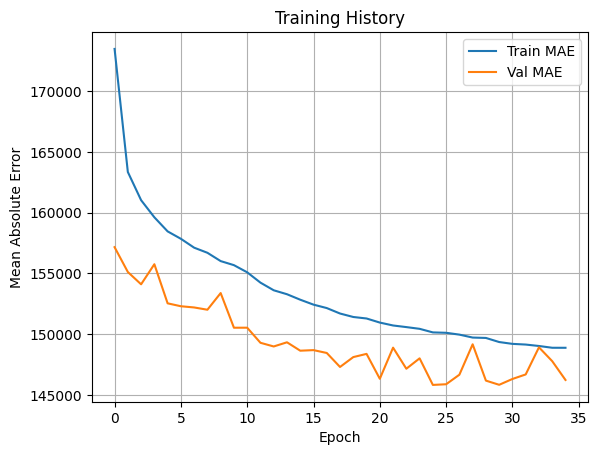

Epoch 1/50


c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31964/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 211911.1094 - mae: 211911.1094
Epoch 1: val_mae improved from inf to 186496.10938, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 211886.8438 - mae: 211886.8438 - val_loss: 186496.1094 - val_mae: 186496.1094
Epoch 2/50
31999/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 190377.8594 - mae: 190377.8594
Epoch 2: val_mae improved from 186496.10938 to 183830.01562, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 190377.3438 - mae: 190377.3438 - val_loss: 183830.0156 - val_mae: 183830.0156
Epoch 3/50
31983/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 186543.6719 - mae: 186543.6719
Epoch 3: val_mae improved from 183830.01562 to 181427.92188, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 186542.8438 - mae: 186542.8438 - val_loss: 181427.9219 - val_mae: 181427.9219
Epoch 4/50
32005/32015 ━━━━━━━

C:\Users\Kuba\AppData\Local\Temp\ipykernel_113204\822195521.py:63: RuntimeWarning: overflow encountered in expm1
  y_pred_actual = np.expm1(y_pred_log)
c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


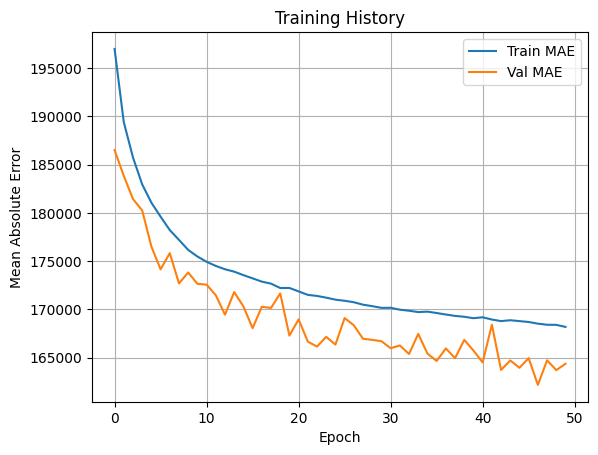

c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
32012/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 191776.8125 - mae: 191776.8125
Epoch 1: val_mae improved from inf to 158771.43750, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 191774.6562 - mae: 191774.6562 - val_loss: 158771.4375 - val_mae: 158771.4375
Epoch 2/50
31972/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 164190.5938 - mae: 164190.5938
Epoch 2: val_mae improved from 158771.43750 to 155280.85938, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 164189.5781 - mae: 164189.5781 - val_loss: 155280.8594 - val_mae: 155280.8594
Epoch 3/50
32008/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 161033.8594 - mae: 161033.8594
Epoch 3: val_mae did not improve from 155280.85938
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 161033.8594 - mae: 161033.8594 - val_loss: 155753.2188 - val_mae: 155753.2188
Epoch 4/50
31995/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 159383.4531

C:\Users\Kuba\AppData\Local\Temp\ipykernel_113204\822195521.py:63: RuntimeWarning: overflow encountered in expm1
  y_pred_actual = np.expm1(y_pred_log)
c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


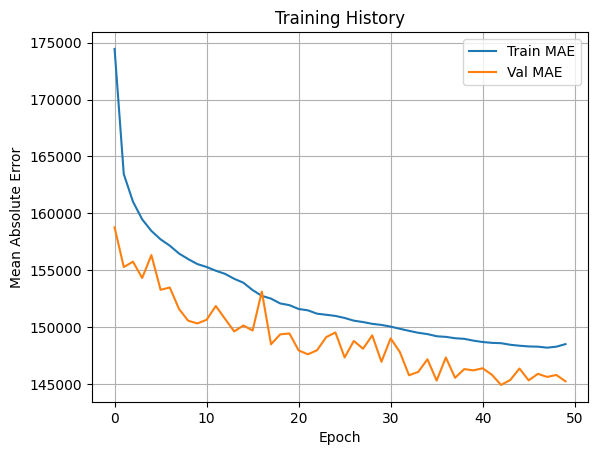

Epoch 1/50


c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31971/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 207210.8906 - mae: 207210.8906
Epoch 1: val_mae improved from inf to 185521.40625, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - loss: 207192.8438 - mae: 207192.8438 - val_loss: 185521.4062 - val_mae: 185521.4062
Epoch 2/50
31995/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 187913.9688 - mae: 187913.9688
Epoch 2: val_mae improved from 185521.40625 to 183312.01562, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - loss: 187913.7500 - mae: 187913.7500 - val_loss: 183312.0156 - val_mae: 183312.0156
Epoch 3/50
31968/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 183897.0781 - mae: 183897.0781
Epoch 3: val_mae improved from 183312.01562 to 180028.73438, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - loss: 183896.9219 - mae: 183896.9219 - val_loss: 180028.7344 - val_mae: 180028.7344
Epoch 4/50
31961/32015 ━━━━━━━

C:\Users\Kuba\AppData\Local\Temp\ipykernel_113204\822195521.py:63: RuntimeWarning: overflow encountered in expm1
  y_pred_actual = np.expm1(y_pred_log)
c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


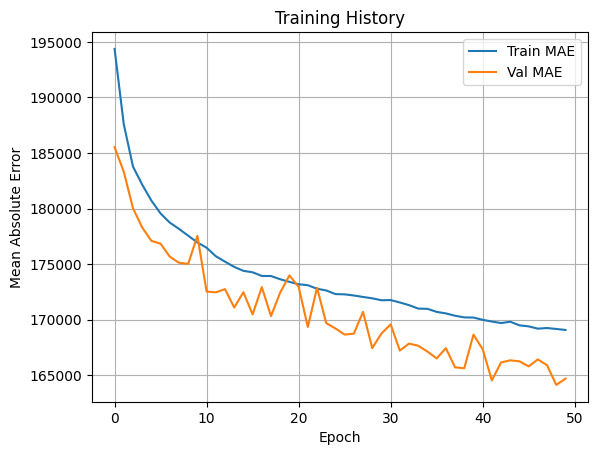

c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31976/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 189908.9219 - mae: 189908.9219
Epoch 1: val_mae improved from inf to 157258.15625, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - loss: 189888.5938 - mae: 189888.5938 - val_loss: 157258.1562 - val_mae: 157258.1562
Epoch 2/50
32004/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 164128.7656 - mae: 164128.7656
Epoch 2: val_mae improved from 157258.15625 to 154883.56250, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step - loss: 164128.4219 - mae: 164128.4219 - val_loss: 154883.5625 - val_mae: 154883.5625
Epoch 3/50
31993/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 161260.1562 - mae: 161260.1562
Epoch 3: val_mae improved from 154883.56250 to 153841.92188, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - loss: 161259.8750 - mae: 161259.8750 - val_loss: 153841.9219 - val_mae: 153841.9219
Epoch 4/50
32009/32015 ━━

C:\Users\Kuba\AppData\Local\Temp\ipykernel_113204\822195521.py:63: RuntimeWarning: overflow encountered in expm1
  y_pred_actual = np.expm1(y_pred_log)
c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


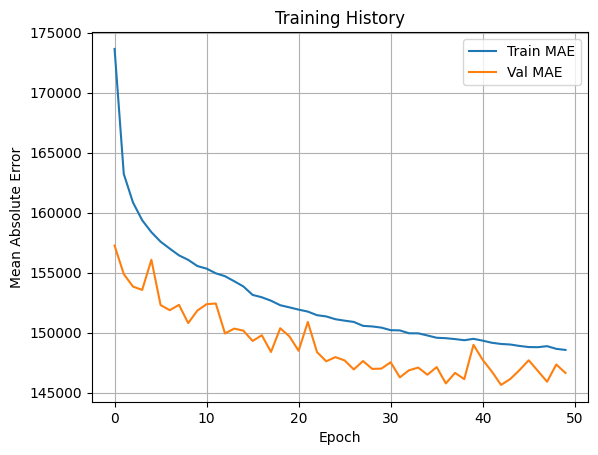

Epoch 1/50


c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31999/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 205303.1094 - mae: 205303.1094
Epoch 1: val_mae improved from inf to 186134.29688, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - loss: 205297.0469 - mae: 205297.0469 - val_loss: 186134.2969 - val_mae: 186134.2969
Epoch 2/50
32009/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 187696.2500 - mae: 187696.2500
Epoch 2: val_mae improved from 186134.29688 to 180720.07812, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 187695.8750 - mae: 187695.8750 - val_loss: 180720.0781 - val_mae: 180720.0781
Epoch 3/50
32010/32015 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 183488.7812 - mae: 183488.7812
Epoch 3: val_mae improved from 180720.07812 to 179268.53125, saving model to models/best_model.keras
32015/32015 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - loss: 183488.7969 - mae: 183488.7969 - val_loss: 179268.5312 - val_mae: 179268.5312
Epoch 4/50
31969/32015 ━━━━━━━

C:\Users\Kuba\AppData\Local\Temp\ipykernel_113204\822195521.py:63: RuntimeWarning: overflow encountered in expm1
  y_pred_actual = np.expm1(y_pred_log)
c:\Users\Kuba\Documents\Studia\sexploracja\project\data_mining_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


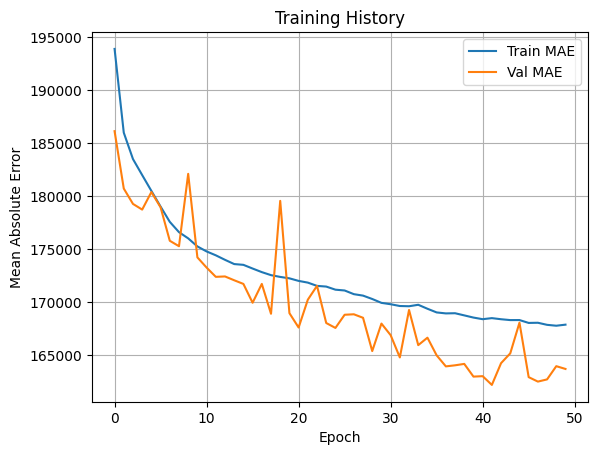

In [53]:
nn_model('nn_model_200c_50s_zipcode_cat', X1, y1)
nn_model('nn_model_zipcode_cat', X2, y2)
nn_model('nn_model_200c_50s_zipcode_f2cat', X3, y3)
nn_model('nn_model_zipcode_f2cat', X4, y4)
nn_model('nn_model_200c_50s_zipcode_f2num', X5, y5)
nn_model('nn_model_zipcode_f2num', X6, y6)

In [54]:
from sklearn.tree import DecisionTreeRegressor
import joblib
def decision_tree_model(model_name, X, y, max_depth=None, min_samples_split=2, random_state=2137):
    os.makedirs("models", exist_ok=True)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Define and train the model
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=random_state)
    model.fit(X_train, y_train)

    # Save the model
    joblib.dump(model, f"models/{model_name}.joblib")

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Test MAE: {mae:.4f}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test R²:  {r2:.4f}")

In [55]:
decision_tree_model('dt_model_200c_50s_zipcode_cat', X1, y1)

Test MAE: 130845.8724
Test MSE: 74187979100.7331
Test R²:  0.6242


In [56]:
decision_tree_model('dt_model_zipcode_cat', X2, y2)
decision_tree_model('dt_model_200c_50s_zipcode_f2cat', X3, y3)
decision_tree_model('dt_model_zipcode_f2cat', X4, y4)
decision_tree_model('dt_model_200c_50s_zipcode_f2num', X5, y5)
decision_tree_model('dt_model_zipcode_f2num', X6, y6)

Test MAE: 130925.5493
Test MSE: 74337082919.3920
Test R²:  0.6235
Test MAE: 151195.4133
Test MSE: 93539918948.7982
Test R²:  0.5262
Test MAE: 153672.5816
Test MSE: 97043612905.2122
Test R²:  0.5085
Test MAE: 151203.3159
Test MSE: 93541548244.7268
Test R²:  0.5262
Test MAE: 153672.2617
Test MSE: 97038142124.2050
Test R²:  0.5085
